<a href="https://colab.research.google.com/github/flaviofogaca/PyProjects/blob/master/RID88289_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapa 01 - Análise Exploratória dos Dados**

Importação das bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

Carregamento e tratamento inicial da base de dados

In [ ]:
# Carregar a base de dados
df = pd.read_csv('/content/data7.csv', encoding='latin1')

# Converter colunas `InvoiceNo`, `StockCode`, `CustomerID` para strings
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)

# Converter coluna `InvoiceDate` para formato datetime sem especificar um formato fixo
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Tratar dados nulos na coluna `CustomerID` e remover linhas com datas inválidas
df['CustomerID'] = df['CustomerID'].fillna('Unknown')
df = df.dropna(subset=['InvoiceDate'])

# Remover dados duplicados
df = df.drop_duplicates()

# Visualizar as primeiras linhas do dataframe
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  


Descrição estatística dos dados

In [ ]:
descricao = df.describe(include='all')
print(descricao)

       InvoiceNo StockCode                         Description       Quantity  \
count     536641    536641                              535187  536641.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2301                                2357            NaN   
mean         NaN       NaN                                 NaN       9.620029   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   
std          NaN       NaN                                 NaN     219.130156   

                          I

Visualização das distribuições e identificação da relevancia das colunas para a análise

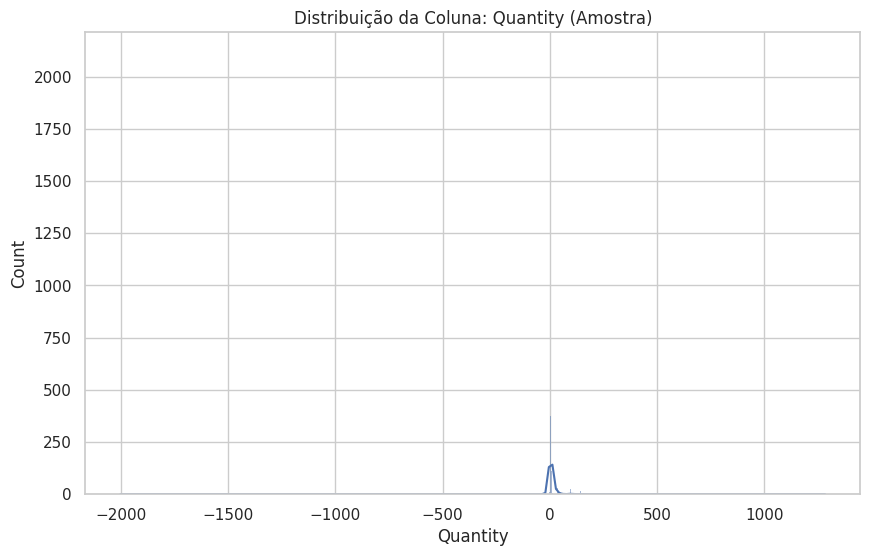

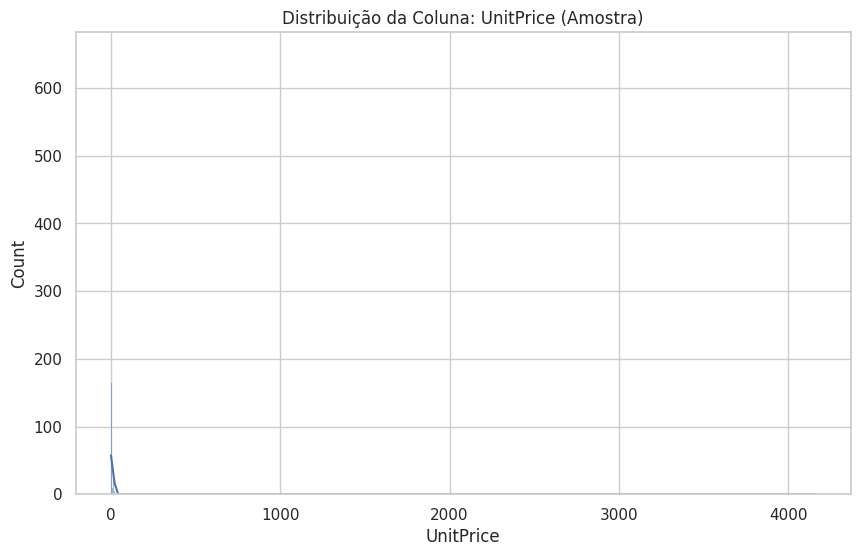

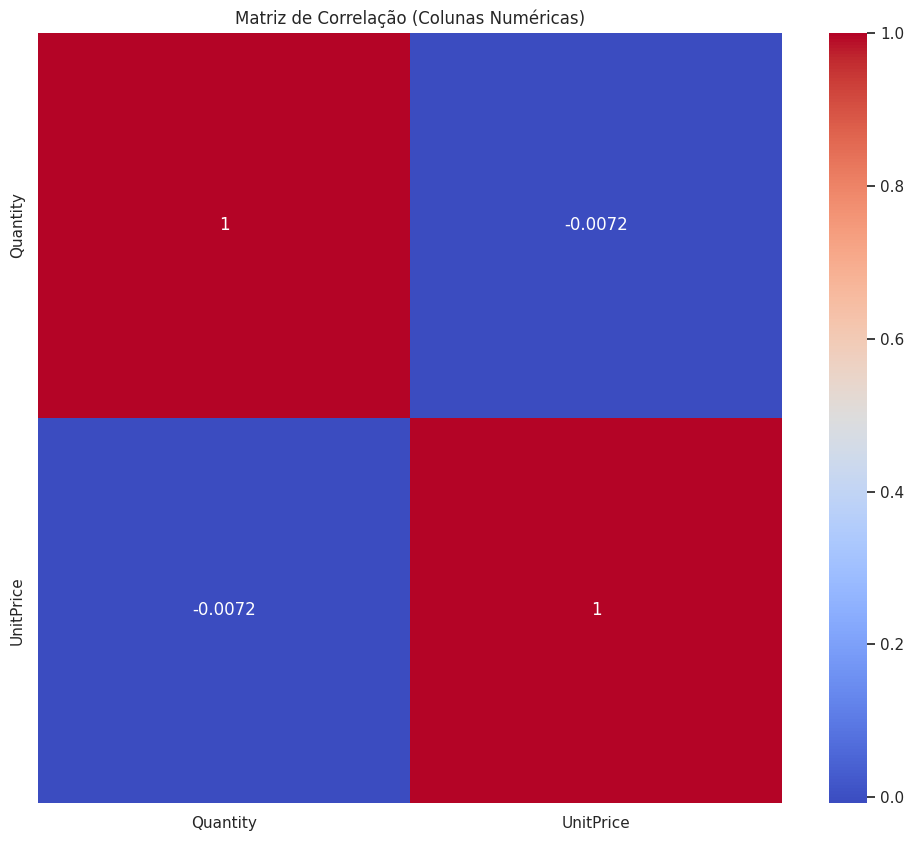

In [ ]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Amostra de dados para visualização (5.000 registros)
sample_df = df.sample(n=5000, random_state=42)

# Visualizar a distribuição de 'Quantity' e 'UnitPrice' com amostra de dados
for column in ['Quantity', 'UnitPrice']:
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_df[column], kde=True)
    plt.title(f'Distribuição da Coluna: {column} (Amostra)')
    plt.show()

# Visualizar a matriz de correlação para identificar a relevância das colunas numéricas
plt.figure(figsize=(12, 10))
numeric_columns = sample_df[['Quantity', 'UnitPrice']]
correlacao = numeric_columns.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Colunas Numéricas)')
plt.show()

Verificando a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados

Dados Nulos:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64
Dados Duplicados: 0


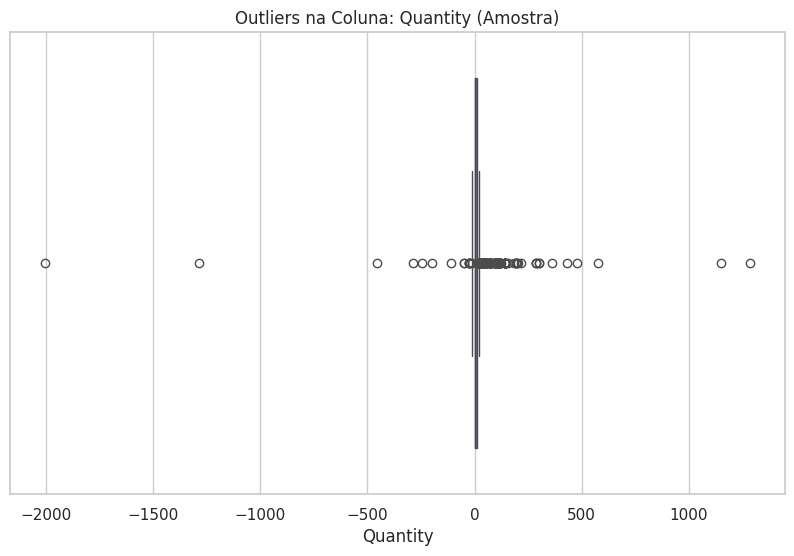

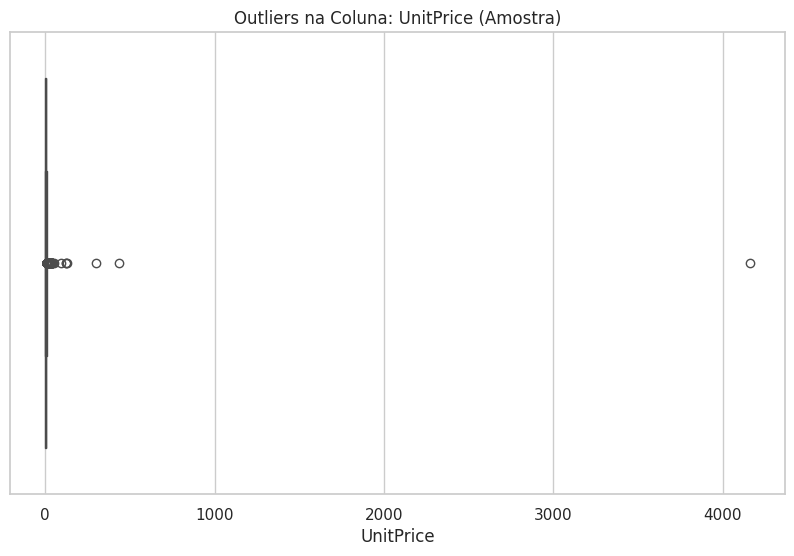

In [ ]:
# Verificar dados nulos
dados_nulos = df.isnull().sum()
print("Dados Nulos:\n", dados_nulos)

# Verificar dados duplicados
dados_duplicados = df.duplicated().sum()
print("Dados Duplicados:", dados_duplicados)

# Visualizar outliers na coluna 'Quantity' e 'UnitPrice' com amostra de dados
for column in ['Quantity', 'UnitPrice']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sample_df[column])
    plt.title(f'Outliers na Coluna: {column} (Amostra)')
    plt.show()

# **Etapa 02 - Pre-Processamento dos Dados**

Normalização dos dados

In [ ]:
# Normalizar colunas numéricas ('Quantity' e 'UnitPrice')
scaler = MinMaxScaler()
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

# Visualizar as primeiras linhas após a normalização
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00   0.221150    17850.0  United Kingdom  
1 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  
2 2010-12-01 08:26:00   0.221154    17850.0  United Kingdom  
3 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  
4 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  


Seleção das variáveis mais relevantes para o modelo

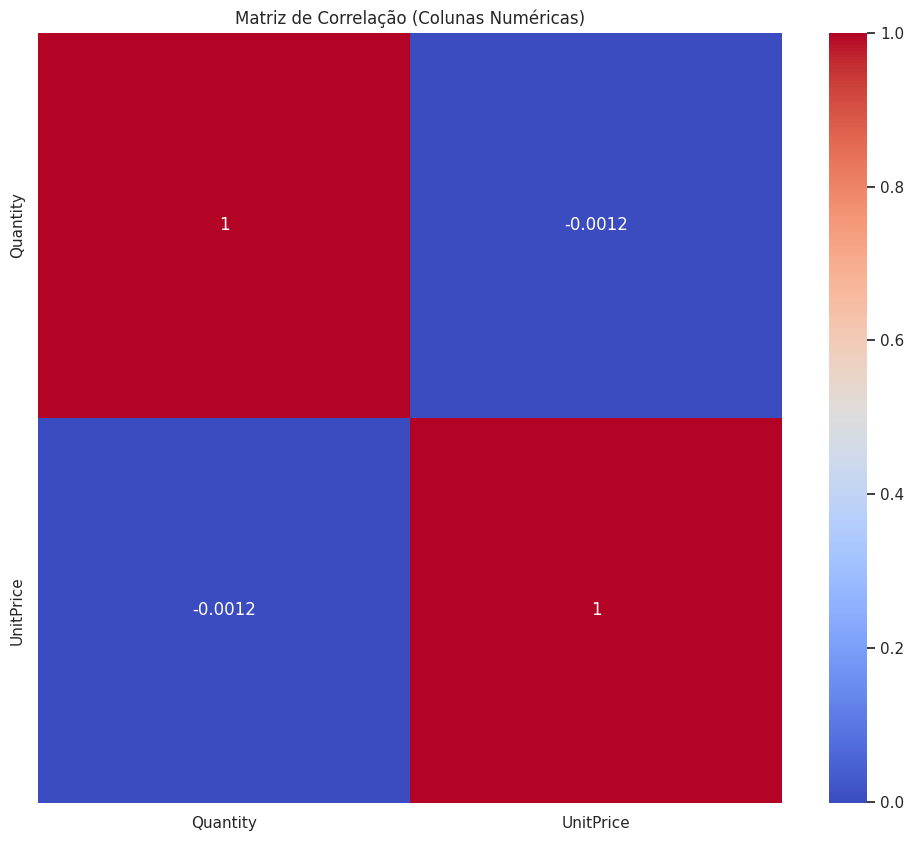

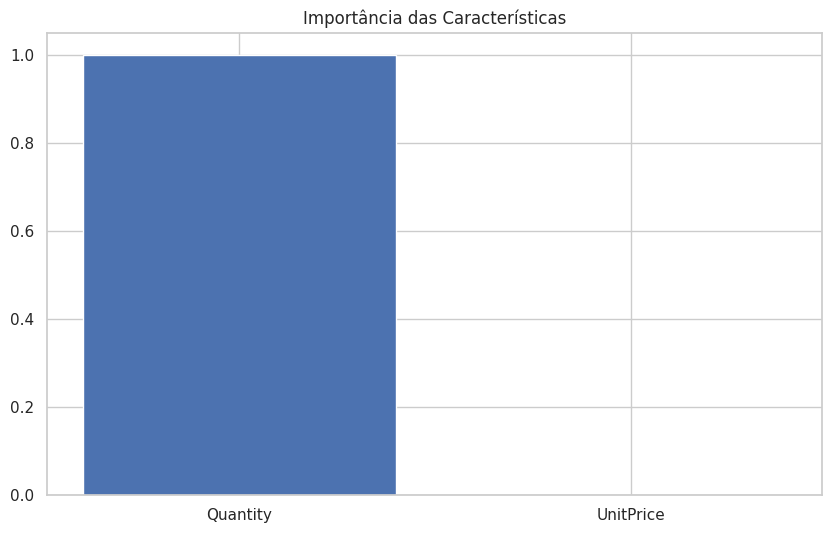

In [ ]:
# Seleção de colunas numéricas para a análise de correlação
numeric_columns = df[['Quantity', 'UnitPrice']]

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 10))
correlacao = numeric_columns.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Colunas Numéricas)')
plt.show()

# Treinar um modelo de Árvore de Decisão para importância das características
X = df[['Quantity', 'UnitPrice']]
y = df['Quantity']  # Dependendo do objetivo, ajuste a variável alvo

modelo = RandomForestRegressor()
modelo.fit(X, y)

# Importância das características
importancias = modelo.feature_importances_
indices = np.argsort(importancias)[::-1]

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X.shape[1]), importancias[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.show()

Remoção dos dados nulos, duplicados, outliers e inconsistentes

In [ ]:
# Remover outliers usando o método IQR (Interquartile Range)
Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizar as primeiras linhas após o pré-processamento
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00   0.221150    17850.0  United Kingdom  
1 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  
2 2010-12-01 08:26:00   0.221154    17850.0  United Kingdom  
3 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  
4 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom  


# **Etapa 03 - Selecionando um Algoritmo para Clusterização dos Dados**

O algoritmo escolhido para a clusterização foi o **K-Means**, pela simplicidade na implementação, velicidade de execução mesmo em grandes conjuntos de dados, além de funcionar muito bem em situações praticas.

Encontrando a quantidade ideal de clusters através do metodo Elbow

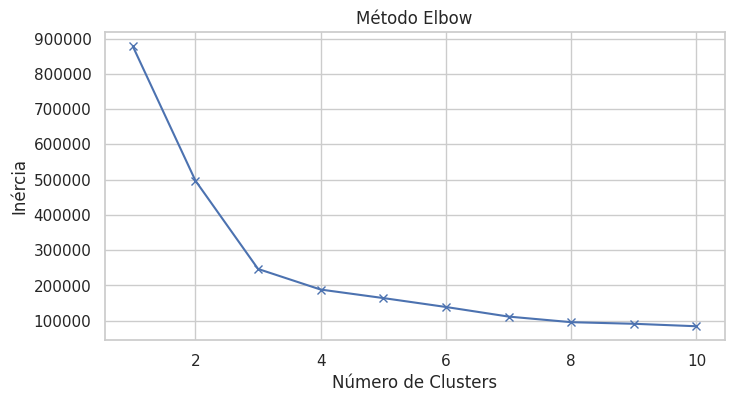

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

# Método Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow')
plt.show()


Implementando o algoritmo escolhido, com número de cluster encontrados

In [ ]:
# Implementação do K-Means com o número ideal de clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao dataframe original
df['cluster'] = clusters

# Visualizar os clusters
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

          InvoiceDate  UnitPrice CustomerID         Country  cluster  
0 2010-12-01 08:26:00   0.221150    17850.0  United Kingdom        1  
1 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom        1  
2 2010-12-01 08:26:00   0.221154    17850.0  United Kingdom        0  
3 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom        1  
4 2010-12-01 08:26:00   0.221167    17850.0  United Kingdom        1  


# **Etapa 04 - Análise dos Cluster Obtidos**

Identificando os padrões e características em comum entre os clientes

In [ ]:
# Calcular as estatísticas descritivas de cada cluster
cluster_stats = df.groupby('cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std'],
    'CustomerID': 'nunique'  # Número de clientes únicos em cada cluster
}).reset_index()

cluster_stats.columns = ['Cluster', 'Quantity_Mean', 'Quantity_Median', 'Quantity_Std', 'UnitPrice_Mean', 'UnitPrice_Median', 'UnitPrice_Std', 'Unique_Customers']
print(cluster_stats)


   Cluster  Quantity_Mean  Quantity_Median  Quantity_Std  UnitPrice_Mean  \
0        0       0.500073         0.500074      0.000017        0.221131   
1        1       0.500016         0.500012      0.000013        0.221136   
2        2       0.500016         0.500012      0.000014        0.221207   

   UnitPrice_Median  UnitPrice_Std  Unique_Customers  
0          0.221128       0.000019              3936  
1          0.221132       0.000017              3711  
2          0.221198       0.000030              3802  


Plotando os gráficos para auxiliar na análise

1. Scatter Plot dos Clusters

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


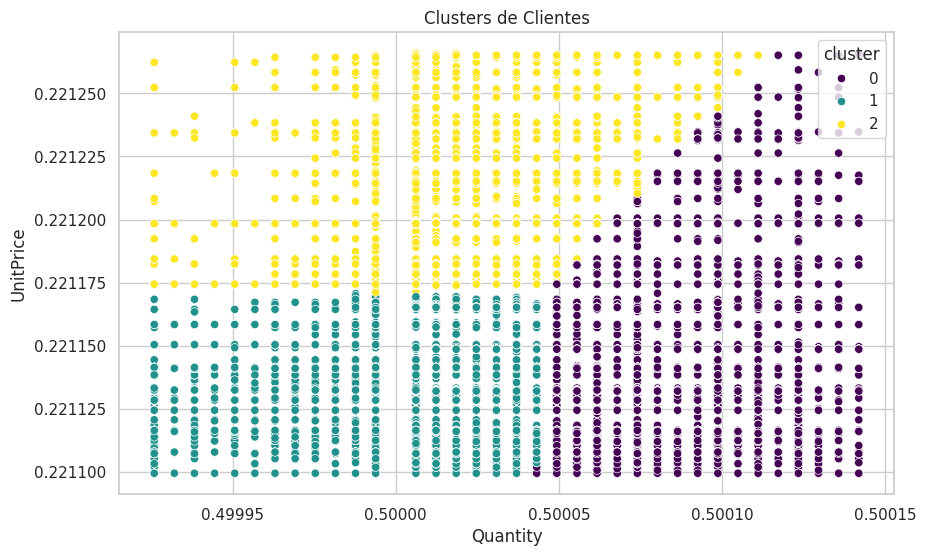

In [ ]:
# Scatter plot dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='cluster', data=df, palette='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


2. Boxplot das Características por Cluster

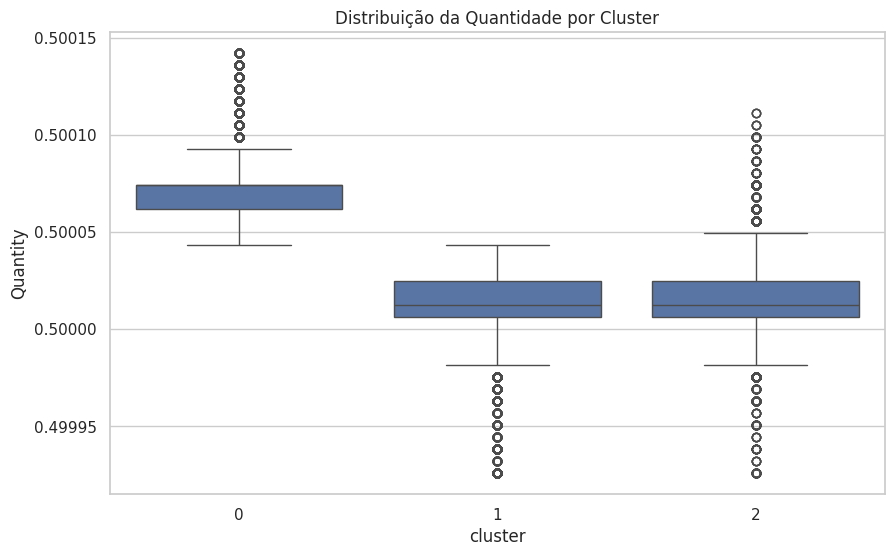

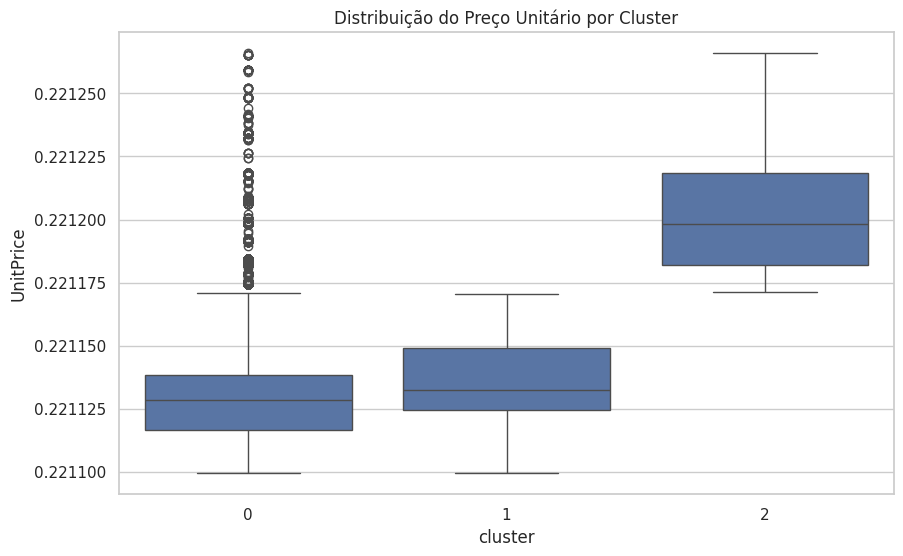

In [ ]:
# Boxplot de 'Quantity' por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Quantity', data=df)
plt.title('Distribuição da Quantidade por Cluster')
plt.show()

# Boxplot de 'UnitPrice' por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='UnitPrice', data=df)
plt.title('Distribuição do Preço Unitário por Cluster')
plt.show()


3. Número de Clientes Únicos pro Cluster

<ipython-input-14-c2aebcdff971>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


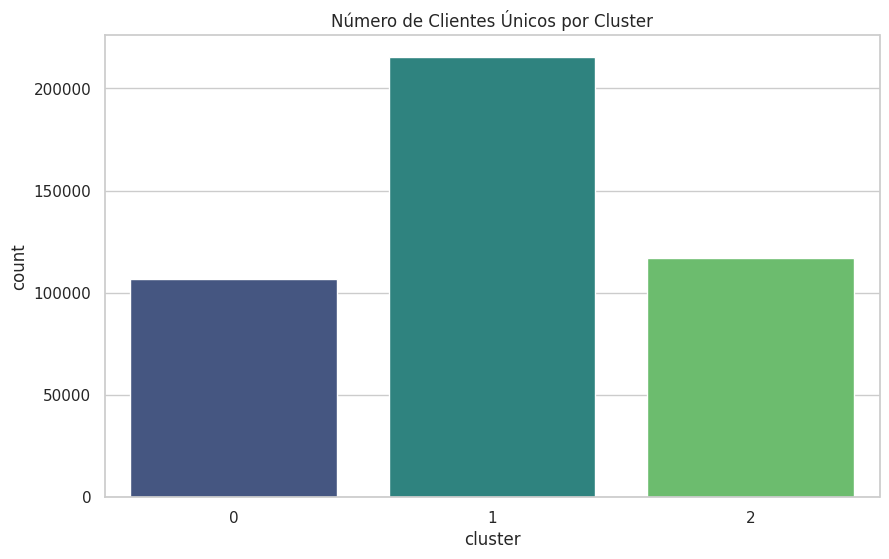

In [ ]:
# Número de clientes únicos por cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Número de Clientes Únicos por Cluster')
plt.show()


Descrição do perfil de compras dos clientes em cada cluster

In [ ]:
# Calcular as estatísticas descritivas de cada cluster
cluster_stats = df.groupby('cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std'],
    'CustomerID': 'nunique'  # Número de clientes únicos em cada cluster
}).reset_index()

cluster_stats.columns = ['Cluster', 'Quantity_Mean', 'Quantity_Median', 'Quantity_Std', 'UnitPrice_Mean', 'UnitPrice_Median', 'UnitPrice_Std', 'Unique_Customers']
print(cluster_stats)


   Cluster  Quantity_Mean  Quantity_Median  Quantity_Std  UnitPrice_Mean  \
0        0       0.500073         0.500074      0.000017        0.221131   
1        1       0.500016         0.500012      0.000013        0.221136   
2        2       0.500016         0.500012      0.000014        0.221207   

   UnitPrice_Median  UnitPrice_Std  Unique_Customers  
0          0.221128       0.000019              3936  
1          0.221132       0.000017              3711  
2          0.221198       0.000030              3802  


Com base nos resultados, podemos descrever os perfis de compras dos clientes em cada cluster:

  *Cluster 0*: Clientes que tendem a comprar grandes quantidades de produtos a preços mais baixos. Pode incluir revendedores ou atacadistas.


  *Cluster 1*: Clientes que compram pequenas quantidades, mas a um preço unitário mais alto. Provavelmente consumidores finais que buscam qualidade.


  *Cluster 2*: Clientes que compram quantidades moderadas a preços médios, equilibrando custo e quantidade.

## Justificativa para a utilidade dessa análise

###A análise de clusterização é extremamente valiosa para a empresa porque permite:

   **Segmentação de Clientes:** Identificar grupos distintos de clientes com base em seus comportamentos de compra. Isso ajuda a empresa a entender melhor seus clientes e adaptar suas estratégias de marketing.

  **Personalização de Marketing:** Desenvolver campanhas de marketing personalizadas para cada segmento de clientes. Por exemplo, ofertas especiais para clientes que compram em grandes quantidades, promoções exclusivas para clientes que preferem produtos de alta qualidade, ou descontos para clientes que compram moderadamente.

   **Melhor Alocação de Recursos:** Direcionar recursos de marketing de forma mais eficaz, focando em segmentos específicos que podem gerar maior retorno sobre o investimento.

###Possíveis ações baseadas nos resultados das análise:

**1.Campanhas de Fidelização:**

  Desenvolver programas de fidelidade para os clientes de cada cluster, oferecendo recompensas e benefícios personalizados.

  Enviar newsletters segmentadas com ofertas e novidades relevantes para cada grupo de clientes.

**2.Promoções Específicas:**

   Oferecer descontos em grandes quantidades para incentivar mais compras dos clientes do Cluster 0.

   Promover produtos premium e de alta qualidade para os clientes do Cluster 1, destacando suas características exclusivas.

   Criar pacotes promocionais que combinem custo e benefício para os clientes do Cluster 2.

**3.Aprimoramento do Atendimento ao Cliente:**

   Treinar a equipe de atendimento ao cliente para reconhecer e atender as necessidades específicas de cada cluster.

   Utilizar dados de clusterização para antecipar problemas e oferecer soluções personalizadas.

**4.Desenvolvimento de Produtos:**

  Ajustar o portfólio de produtos com base nas preferências dos diferentes clusters.

  Introduzir novos produtos ou serviços que atendam às necessidades específicas de cada segmento de clientes.